In [1]:
#Imports
import pandas as pd

In [2]:
#Read population data from file

df_pop = pd.read_csv('population.csv')
df_pop.columns = ['Year', 'Population']
print(df_pop.head())

     Year    Population
0  1601.0  8.474271e+06
1  1602.0  8.455985e+06
2  1603.0  8.437709e+06
3  1604.0  8.419454e+06
4  1605.0  8.401229e+06


In [3]:
#Read PPD
df_ppd_raw = pd.read_csv('spain_ppd_projections_1600_2100.csv')
df_ppd = df_ppd_raw.drop('Method', axis=1)
print(df_ppd.head())

   Year  PPD_Projected
0  1600          6.000
1  1601          5.996
2  1602          5.992
3  1603          5.988
4  1604          5.984


In [4]:
#Stock calculation
# Merge the dataframes on Year
df_combined = pd.merge(df_pop, df_ppd, on='Year')

# Multiply the value columns (assuming the second column in each is the value)
# Adjust column names based on your actual population column name
df_combined['Product'] = df_combined.iloc[:, 1] / df_combined['PPD_Projected']

# Get just Year and Product
result = df_combined[['Year', 'Product']]
print(result.head())

     Year       Product
0  1601.0  1.413321e+06
1  1602.0  1.411212e+06
2  1603.0  1.409103e+06
3  1604.0  1.406994e+06
4  1605.0  1.404888e+06


In [ ]:
# reading vertification data from excel file
vertification = pd.read_excel("stock_vertification.xlsx", index_col = None, header = 0, usecols = 'A:B')
print(vertification)

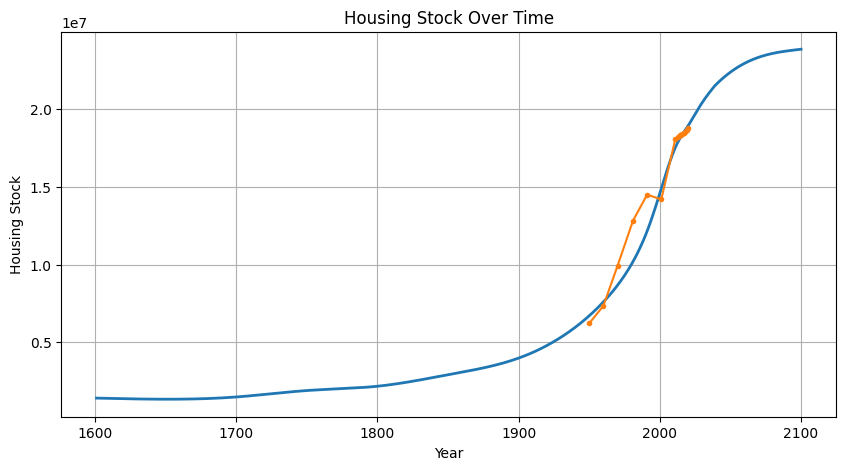

In [ ]:
#Plotting housing stock over time with vertification data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(result['Year'], result['Product'], linestyle='-', lw = 2)
plt.plot(vertification['year'], vertification['main dwelling'], linestyle='-', marker='.', label='Stock Vertification')
plt.title('Housing Stock Over Time')
plt.xlabel('Year')
plt.ylabel('Housing Stock')
plt.grid(True)
plt.show()